In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib
import os

warnings.filterwarnings("ignore")

%matplotlib inline

## importing the cleaned data

In [3]:
df=pd.read_csv('google_cleaned.csv') 

In [4]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


### shape of the data

In [6]:
df.shape

(10840, 16)

### summary of the dataset


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9366.0,4.191757e+00,5.152189e-01,1.0,4.0,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0,38.0,2094.0,54775.5,7.815831e+07
Size,9145.0,2.150653e+04,2.259602e+04,10.0,4900.0,13000.0,30000.0,1.000000e+05
Installs,10840.0,1.546434e+07,8.502936e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.0,0.0,0.0,0.0,4.000000e+02
day,10840.0,1.560904e+01,9.561621e+00,1.0,6.0,16.0,24.0,3.100000e+01
month,10840.0,6.422325e+00,2.578388e+00,1.0,5.0,7.0,8.0,1.200000e+01
year,10840.0,2.017400e+03,1.100914e+00,2010.0,2017.0,2018.0,2018.0,2.018000e+03


In [6]:
#checking the data types
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
day                 int64
month               int64
year                int64
dtype: object

In [7]:
#checking the na values
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
day                  0
month                0
year                 0
dtype: int64

In [8]:
#checking the duplicates in the data
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [9]:
#droping the duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(10357, 16)

### exploring the data

In [8]:
#defining numerical and categorical features
num_fea=[fea for fea in df.columns if df[fea].dtype!='O']
cat_fea=[fea for fea in df.columns if df[fea].dtype=='O']
print(f'numerical features are: {num_fea} \n categorical features are : {cat_fea} ')


numerical features are: ['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year'] 
 categorical features are : ['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'] 


In [12]:
df_num=df[num_fea]

In [13]:
df_num.head(2)

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19000.0,10000,0.0,7,1,2018
1,3.9,967,14000.0,500000,0.0,15,1,2018


In [9]:
df_cat=df[cat_fea]

In [15]:
df_cat.head(2)

,App,Category,Type,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,Free,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,Free,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


## Feature information
* App: it tells name of the app
* Category: this feature tells about which field it belongs to or what is the purpose of the app
* Ratings: this is app rating in app store
* size: this is amount of space required by the app in the mobile
* Type: tells if app is free or paid#
* Price: price of the app
* Content rating: this tells us that if app is for mature audience or for everyone
* Genres: this tell to which app belong to
* Last updated: this tells us the latest firmware update or quality of life update to the app
* current ver: which tells the latest version of the app after upgraded to latest firmware
* Andriod ver: tells us the latest andriod bersion
* Day: Last updated segrated part
* month: Last updated segrated part
* year: Last updated segrated part 

In [10]:
#proportion of data in categorical columns
for col in cat_fea:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

ROBLOX                                                0.083026
CBS Sports App - Scores, News, Stats & Watch Live     0.073801
ESPN                                                  0.064576
Duolingo: Learn Languages Free                        0.064576
Candy Crush Saga                                      0.064576
                                                        ...   
Meet U - Get Friends for Snapchat, Kik & Instagram    0.009225
U-Report                                              0.009225
U of I Community Credit Union                         0.009225
Waiting For U Launcher Theme                          0.009225
iHoroscope - 2018 Daily Horoscope & Astrology         0.009225
Name: App, Length: 9659, dtype: float64
---------------------------
FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNIC

### Univariate analysis 
* purpose of this is analysis the single variable of the data

In [17]:
df_num

,Rating,Reviews,Size,Installs,Price,day,month,year
0,4.1,159,19000.0,10000,0.0,7,1,2018
1,3.9,967,14000.0,500000,0.0,15,1,2018
2,4.7,87510,8700.0,5000000,0.0,1,8,2018
3,4.5,215644,25000.0,50000000,0.0,8,6,2018
4,4.3,967,2800.0,100000,0.0,20,6,2018
...,...,...,...,...,...,...,...,...
10835,4.5,38,53000.0,5000,0.0,25,7,2017
10836,5.0,4,3600.0,100,0.0,6,7,2018
10837,NaN,3,9500.0,1000,0.0,20,1,2017
10838,4.5,114,NaN,1000,0.0,19,1,2015


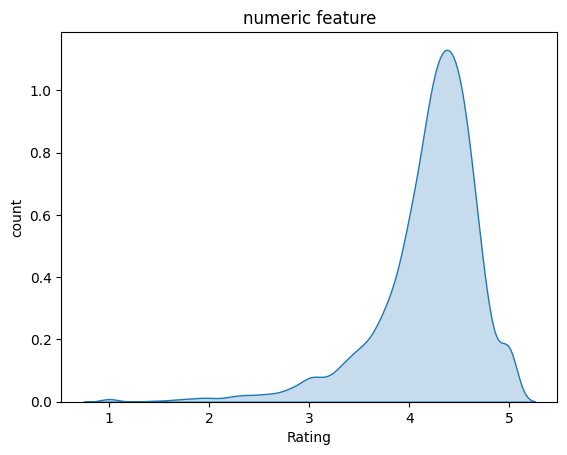

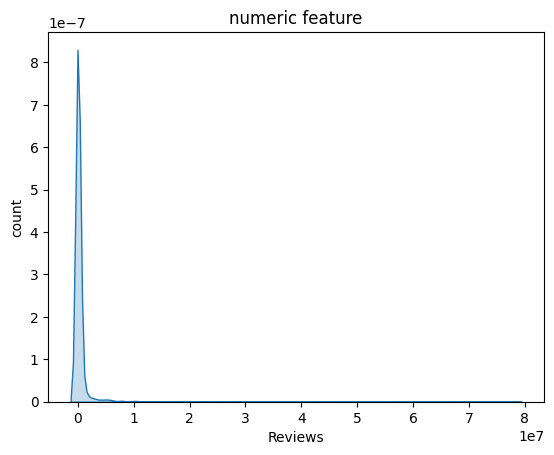

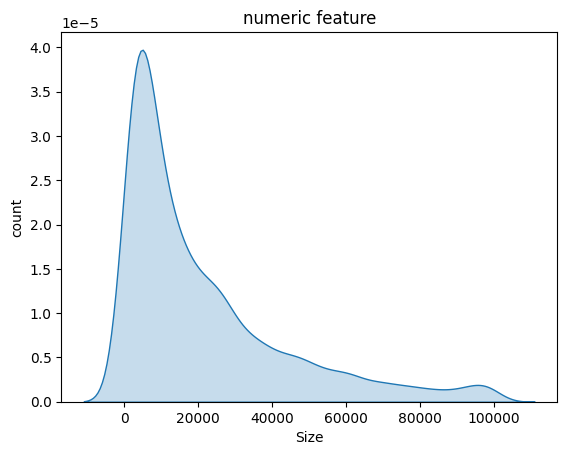

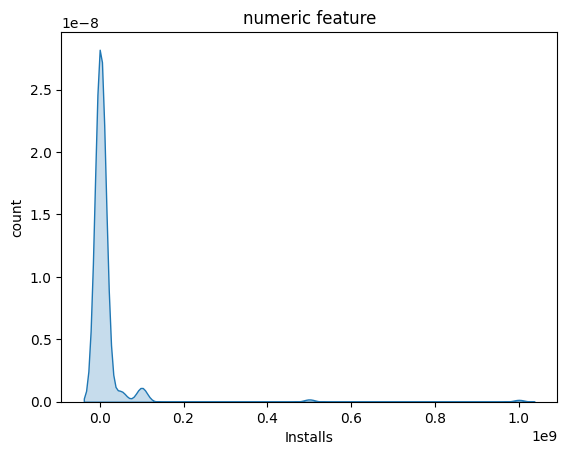

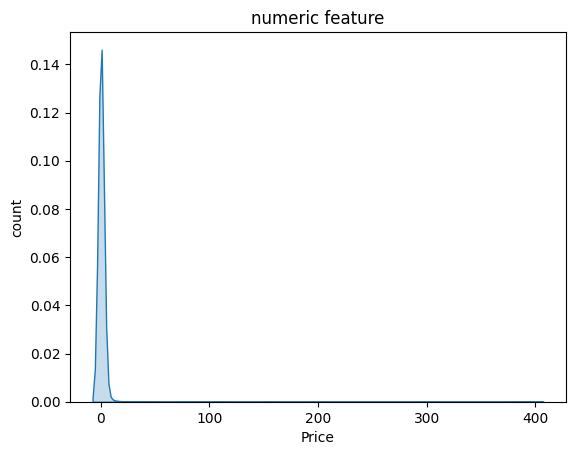

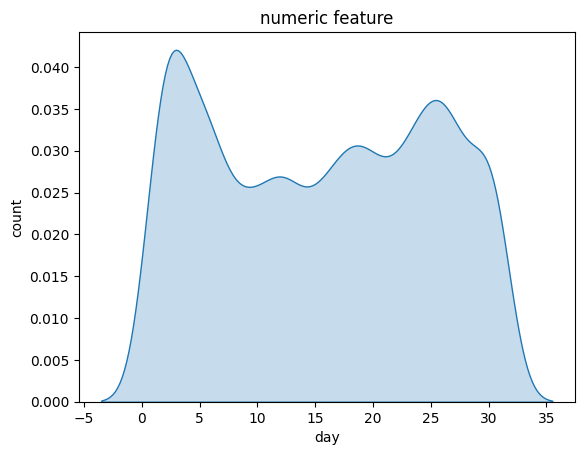

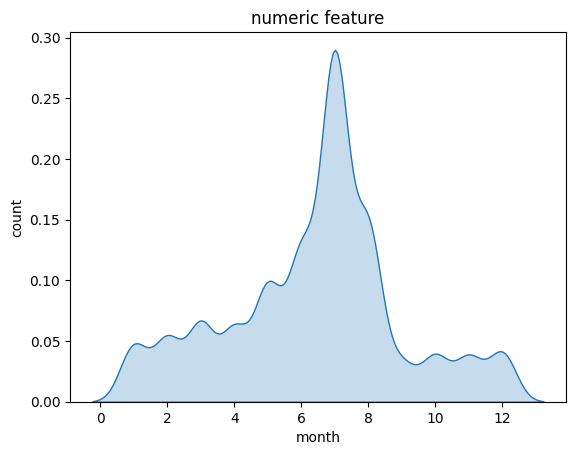

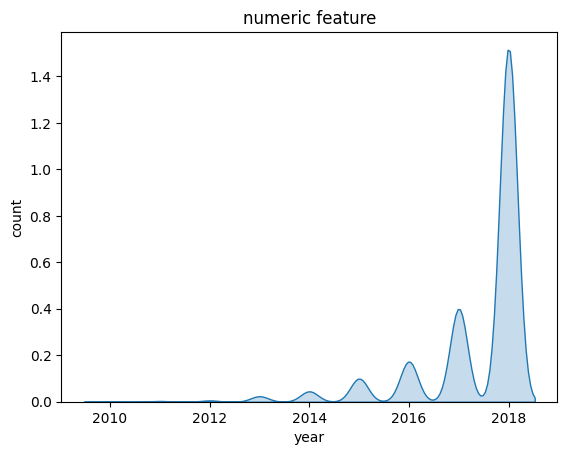

In [18]:
for i in df_num:
    sns.kdeplot(df_num[i], shade=True)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.title('numeric feature')
    plt.show()
    

* as we can this is kde plot
* there are outliers in ratings and size
* install and price, reviews are right skewed
* ratings is left skewed

* below is cleaner way

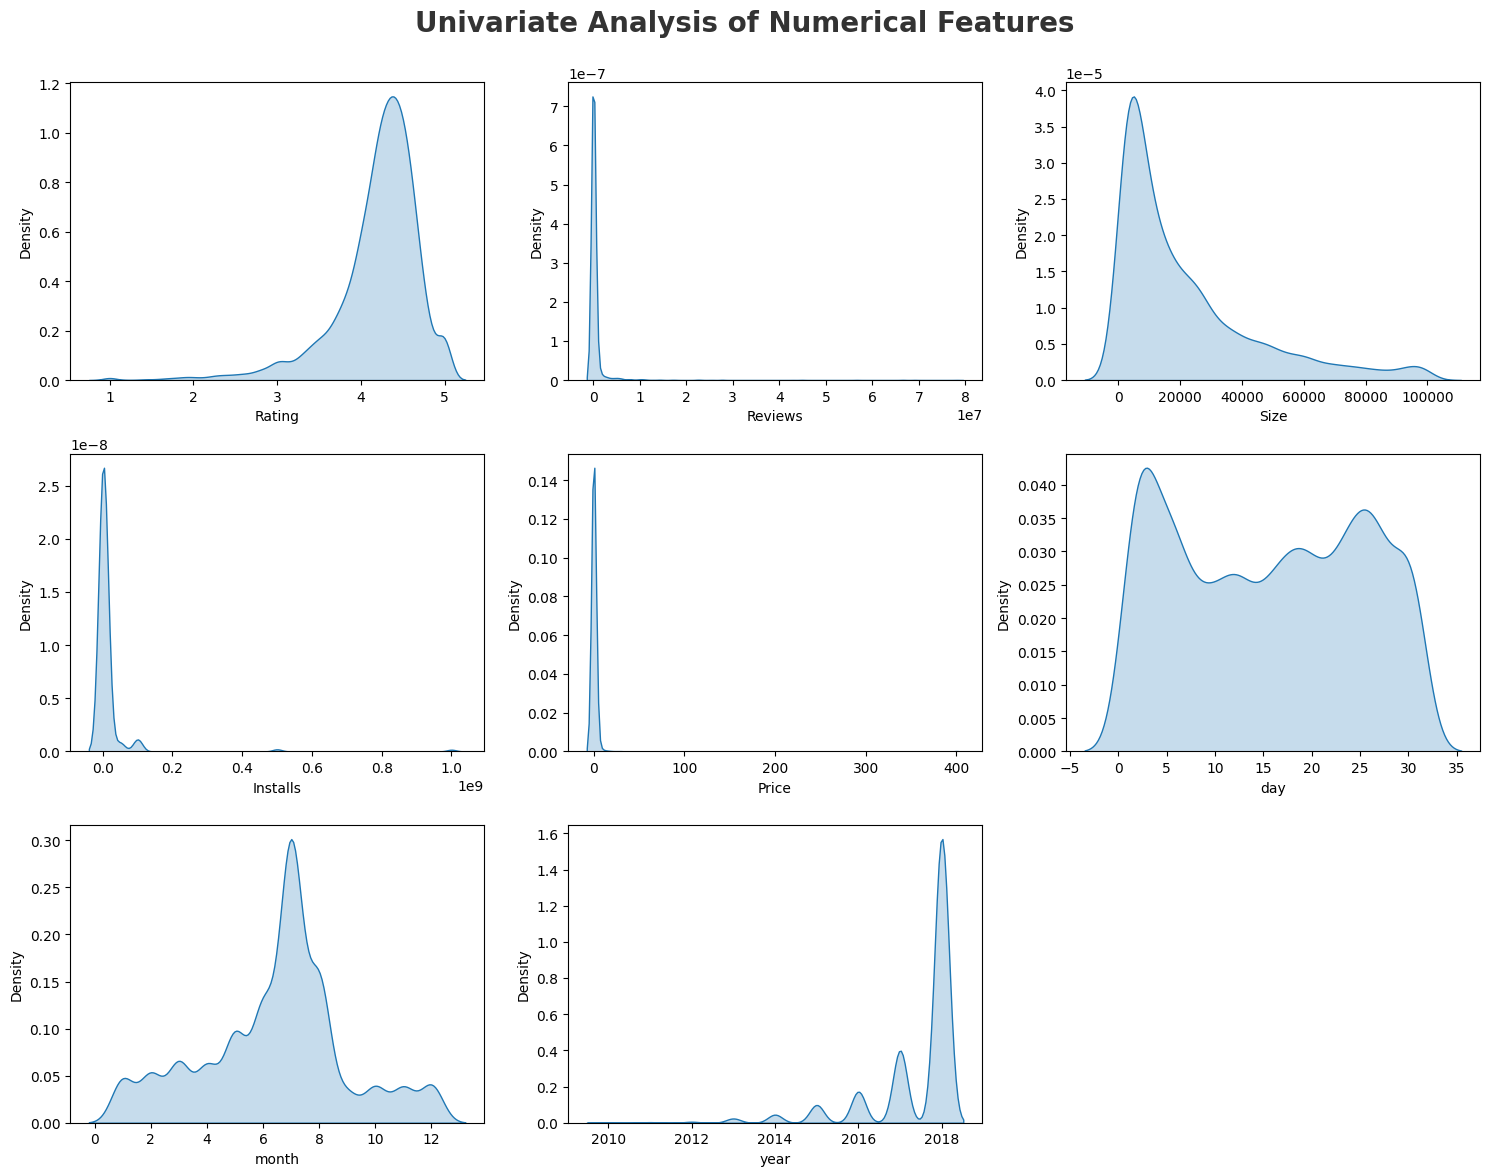

In [11]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_fea)):
    plt.subplot(4, 3, i+1)
    sns.kdeplot(x=df[num_fea[i]],shade=True)
    plt.xlabel(num_fea[i])
    plt.tight_layout()

## categorical features analysis
 

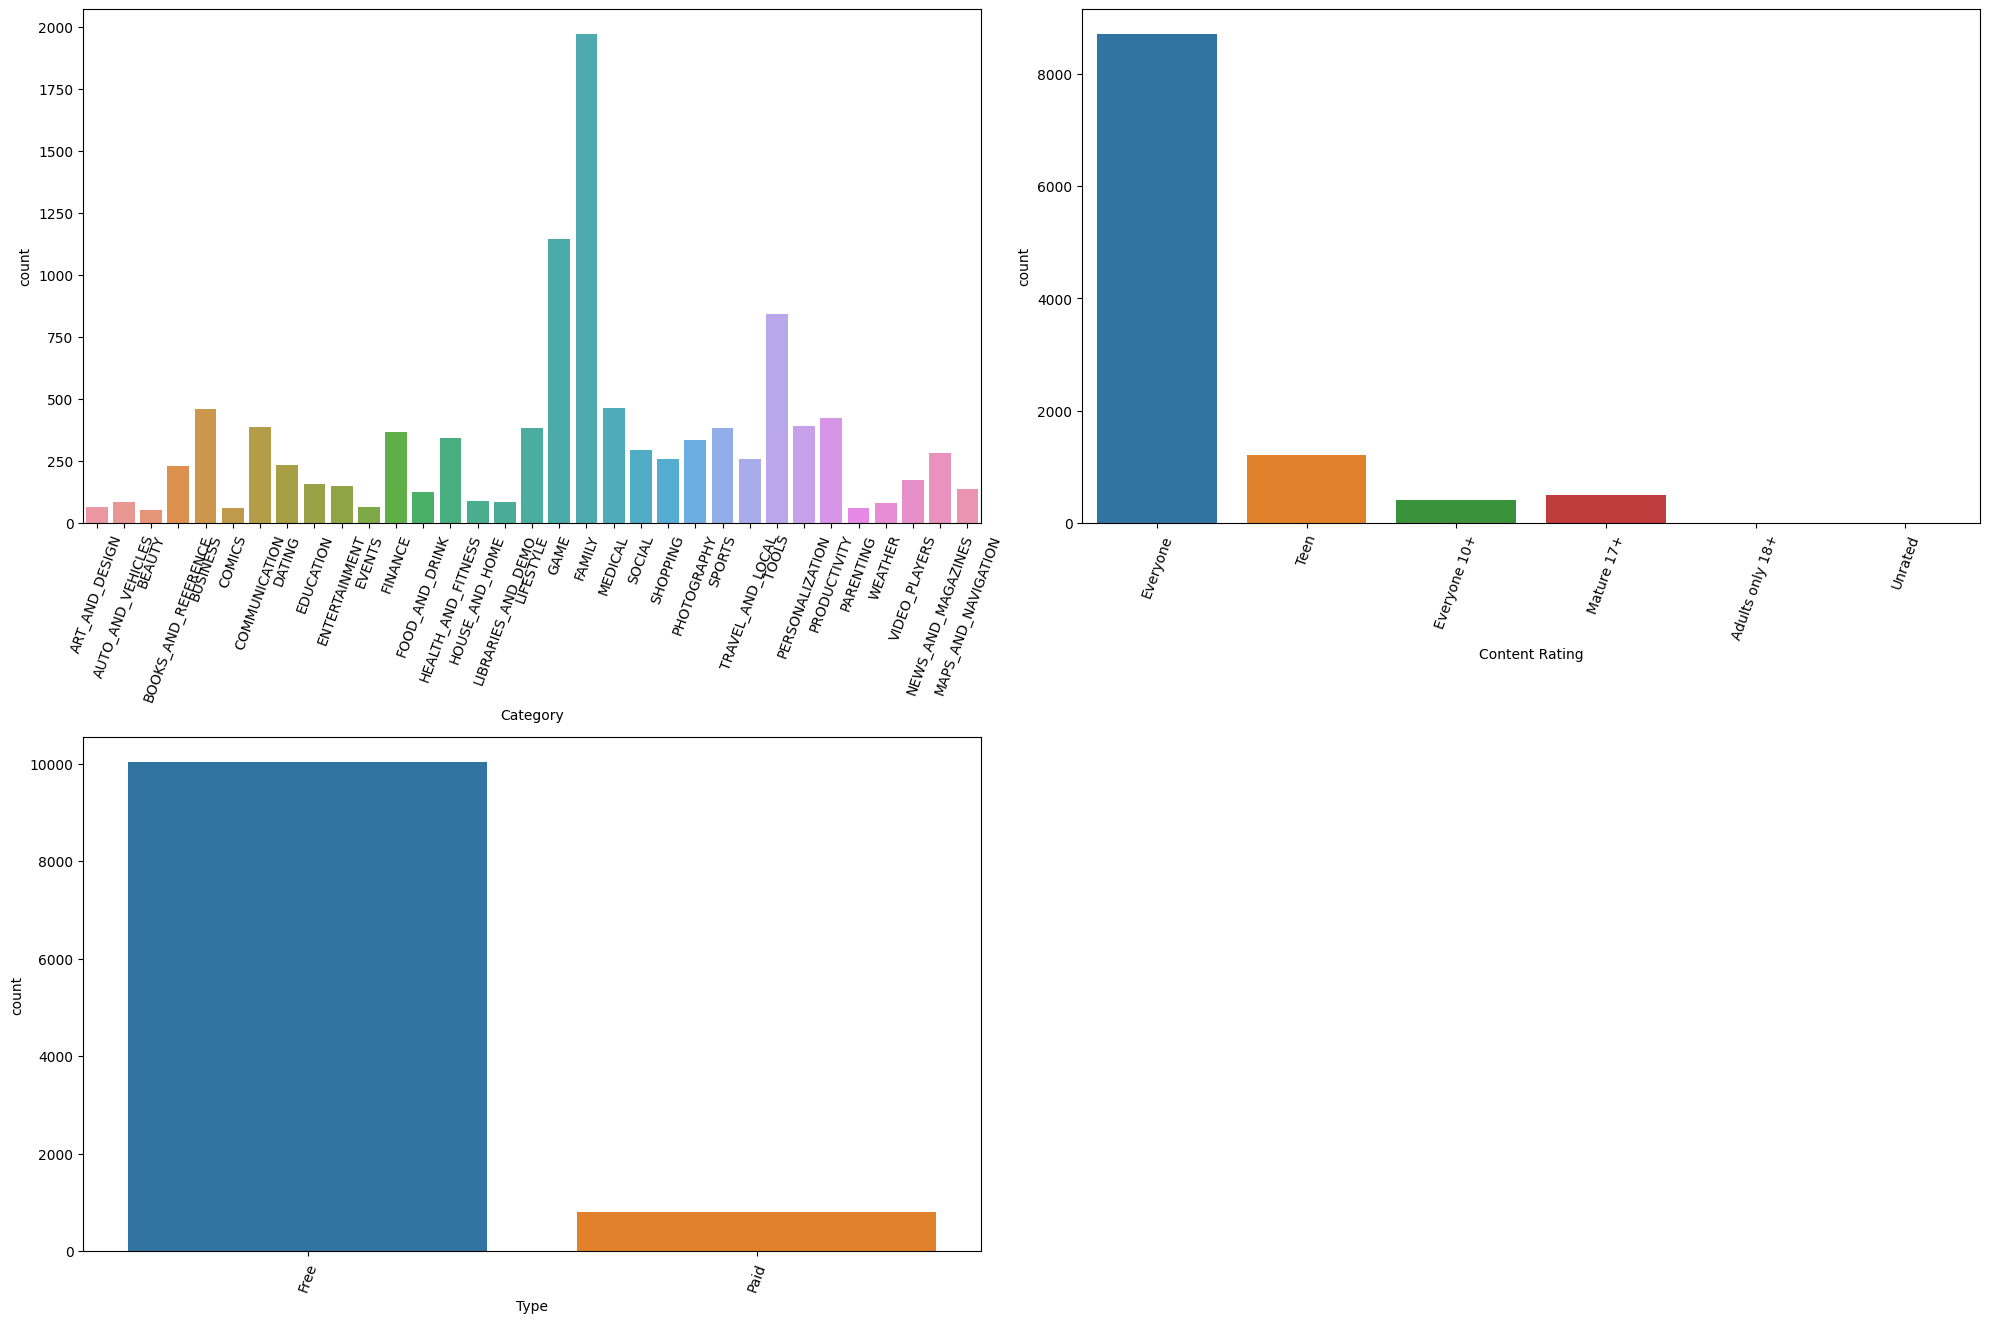

In [14]:
plt.figure(figsize=(20,20))
cat1=['Category','Content Rating','Type']
for i in range(0, len(cat1)):
    plt.subplot(3,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xticks(rotation=70)
    plt.tight_layout()

* as we can see that there are more free apps than paid
* apps which are made for family use are more than any other category
* Most apps rating is everyone that mean anyone can use it

<AxesSubplot: ylabel='Category'>

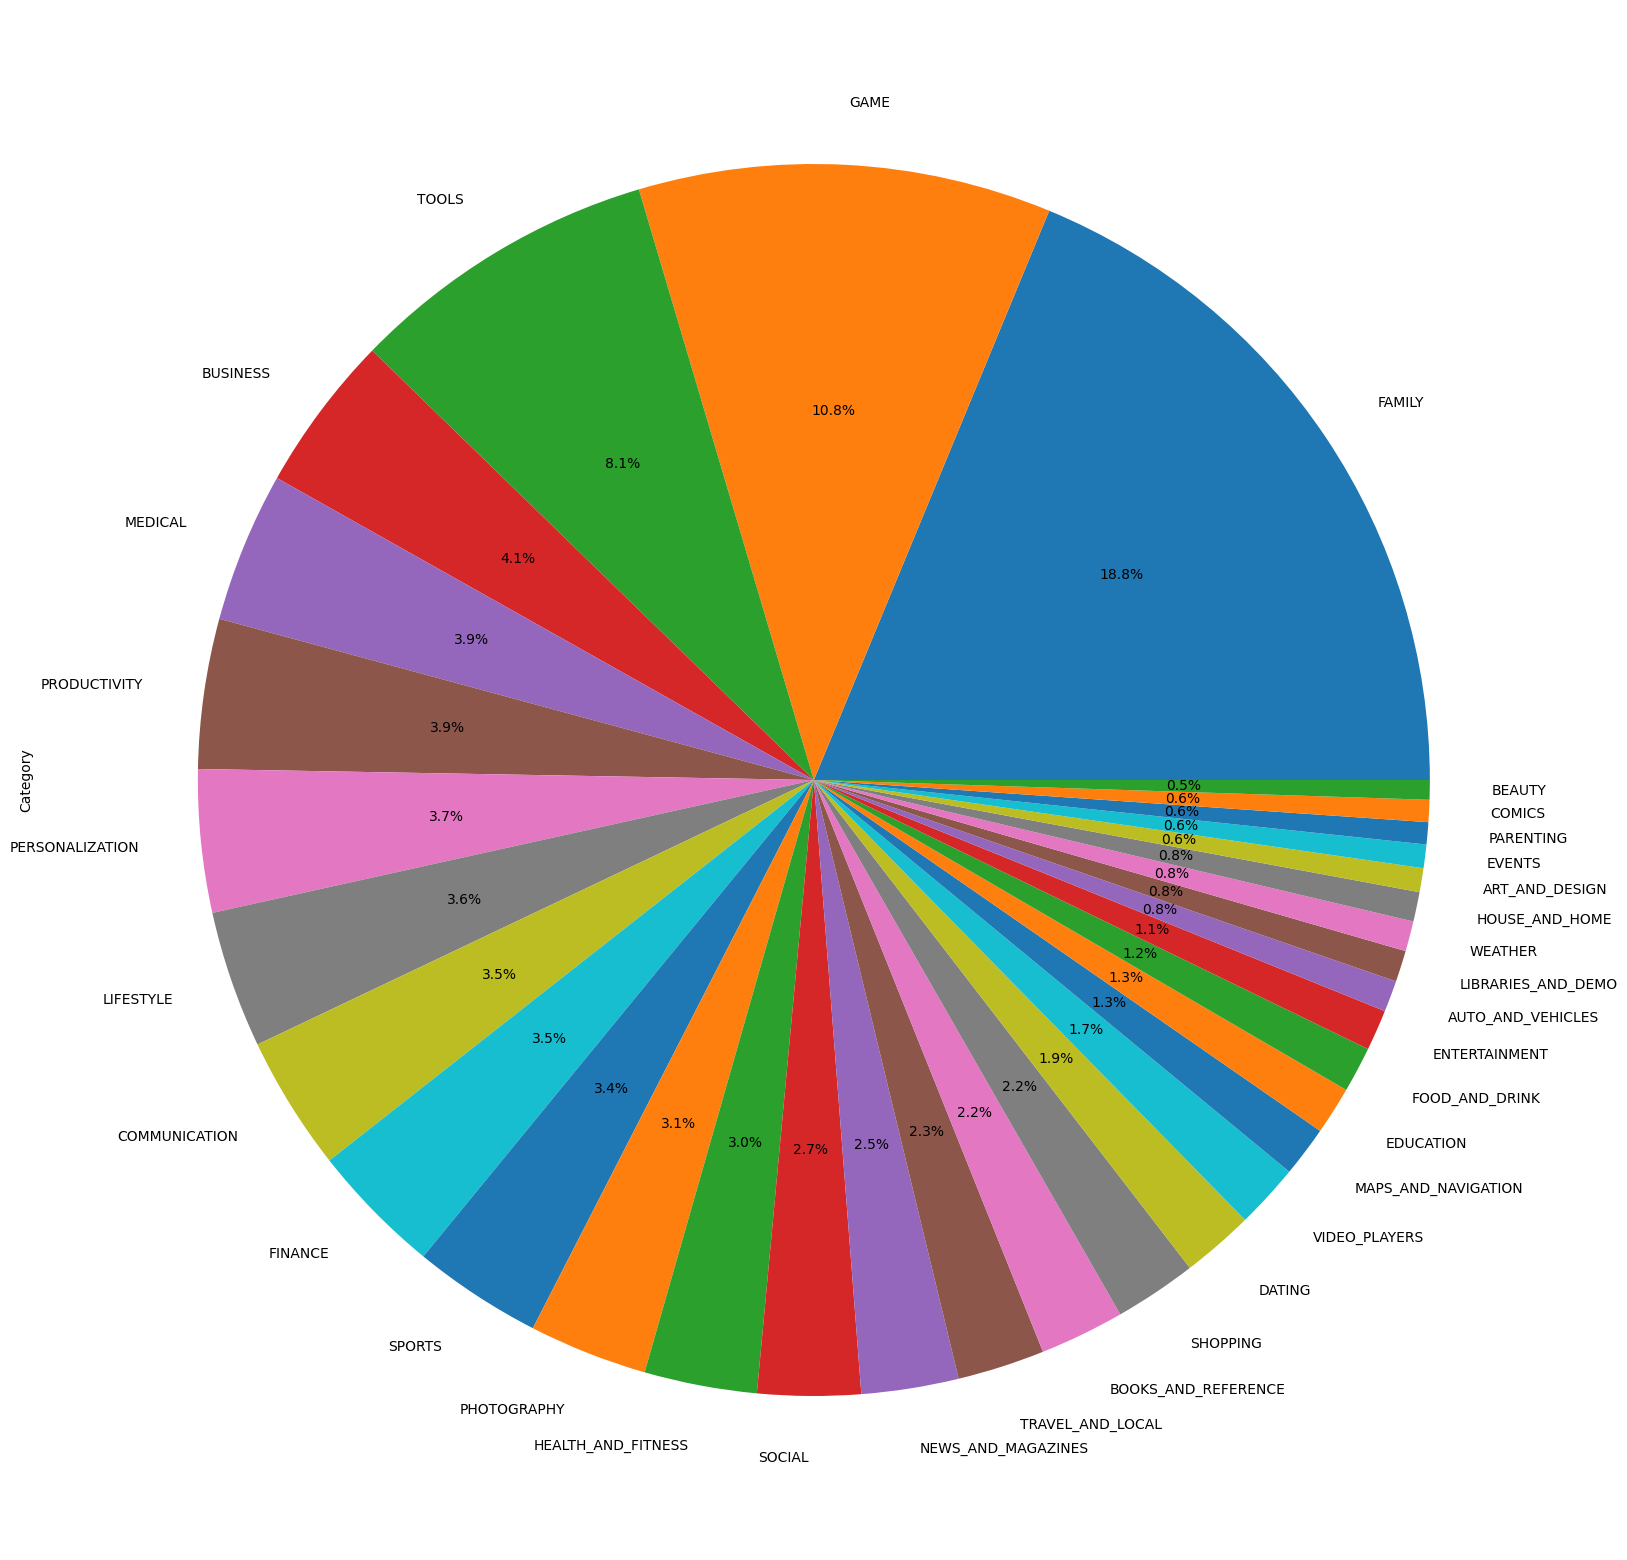

In [21]:
df_cat['Category'].value_counts().plot.pie(figsize=(20,20), autopct='%1.1f%%')


In [17]:
#to take out the top 10 category
df_cat['Category'].value_counts().head(10)
#or
category=pd.DataFrame(df_cat['Category'].value_counts())

In [18]:
category.head(10)

,Category
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


In [19]:
#rename the column
category.rename(columns={'Category':'Counts'},inplace=True)
category.head(10)

,Counts
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'GAME'),
  Text(2, 0, 'TOOLS'),
  Text(3, 0, 'MEDICAL'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'PRODUCTIVITY'),
  Text(6, 0, 'PERSONALIZATION'),
  Text(7, 0, 'COMMUNICATION'),
  Text(8, 0, 'SPORTS'),
  Text(9, 0, 'LIFESTYLE')])

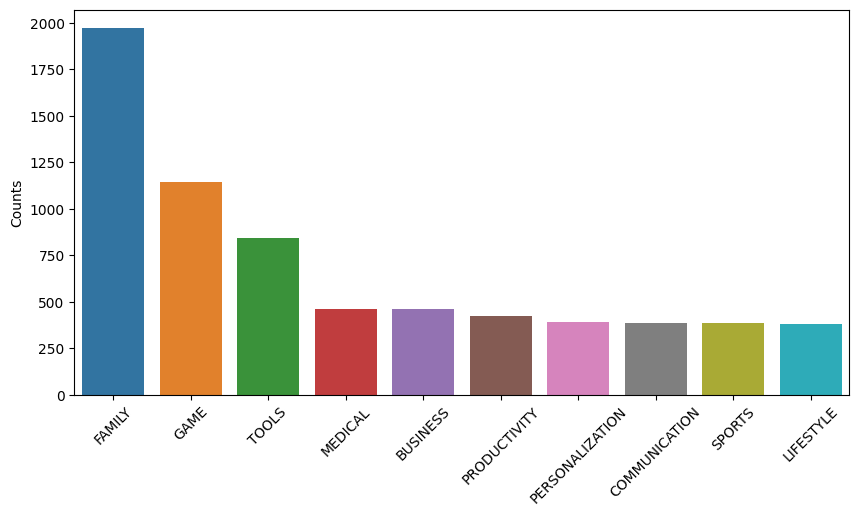

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x=category.index[:10],y='Counts',data=category[:10])
plt.xticks(rotation=45)



### Bivariate analysis

<AxesSubplot: xlabel='Category'>

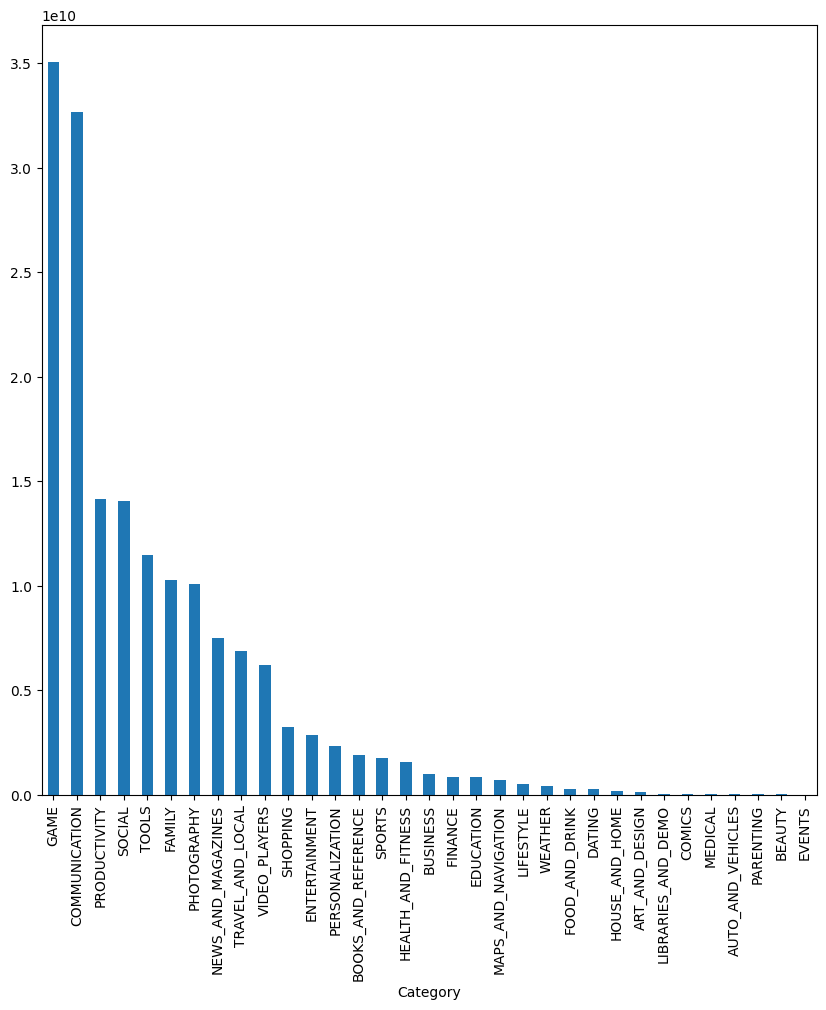

In [34]:
#finding the largest installation of particular variable
df.groupby('Category').Installs.sum().sort_values(ascending=False).plot(kind='bar',figsize=(10,10))

<AxesSubplot: ylabel='Type'>

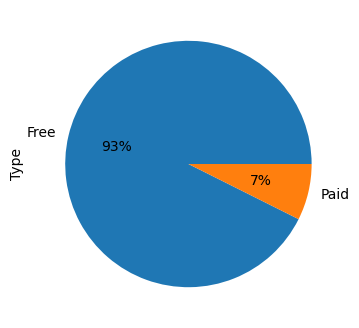

In [93]:
#Free Vs paid
df['Type'].value_counts().plot(kind='pie',figsize=(4,4), autopct='%1.f%%')

## multivarirate analysis 
* analysis of more than one variable

In [30]:
df_cat['Genres'].value_counts()

Tools                                842
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

In [31]:
df.corr()

,Rating,Reviews,Size,Installs,Price,day,month,year
Rating,1.000000,0.068732,0.082187,0.050886,-0.022355,-0.010102,0.016999,0.136547
Reviews,0.068732,1.000000,0.237880,0.634997,-0.009417,-0.024677,0.044681,0.075744
Size,0.082187,0.237880,1.000000,0.168883,-0.023729,-0.004368,0.036932,0.217284
Installs,0.050886,0.634997,0.168883,1.000000,-0.011147,-0.043546,0.053847,0.087380
Price,-0.022355,-0.009417,-0.023729,-0.011147,1.000000,-0.008480,0.006490,-0.005627
day,-0.010102,-0.024677,-0.004368,-0.043546,-0.008480,1.000000,-0.074367,-0.015239
month,0.016999,0.044681,0.036932,0.053847,0.006490,-0.074367,1.000000,-0.190497
year,0.136547,0.075744,0.217284,0.087380,-0.005627,-0.015239,-0.190497,1.000000


<AxesSubplot: >

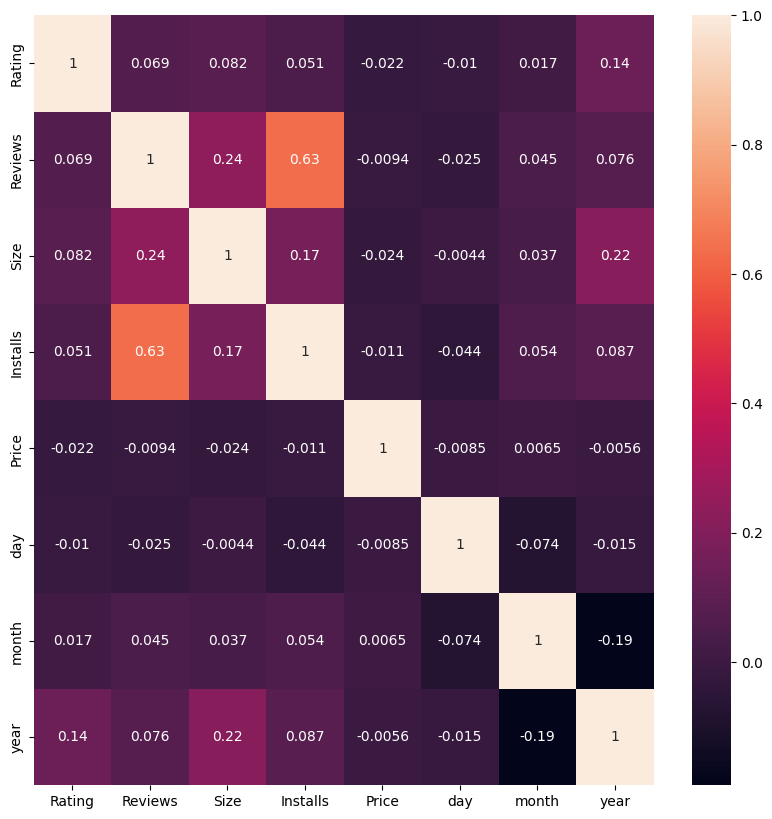

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

* **As we can that the correaltion heatmap between the variables

In [70]:
#how many apps with 5 ratings
df[df['Rating']==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4400.0,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9300.0,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10720,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up,19,6,2017
10741,GKPB FP Online Church,LIFESTYLE,5.0,32,7900.0,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up,31,12,2017
10775,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up,5,3,2018
10819,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up,27,6,2018


In [79]:
##which are the top 20 most insatlled generes

In [232]:
top_genres=df['Genres'].value_counts().reset_index().rename(columns={'index':'Genres','Genres':'Counts'})

In [233]:
top_genres.head()

,Genres,Counts
0,Tools,842
1,Entertainment,623
2,Education,549
3,Medical,463
4,Business,460


In [264]:
top_installs_g=df.groupby(['Genres']).Installs.sum()

In [265]:
top_install_genres=pd.merge(top_genres, top_installs_g, on='Genres')

In [242]:
top_install_genres_20=top_install_genres.head(20)

<AxesSubplot: xlabel='Genres', ylabel='Counts'>

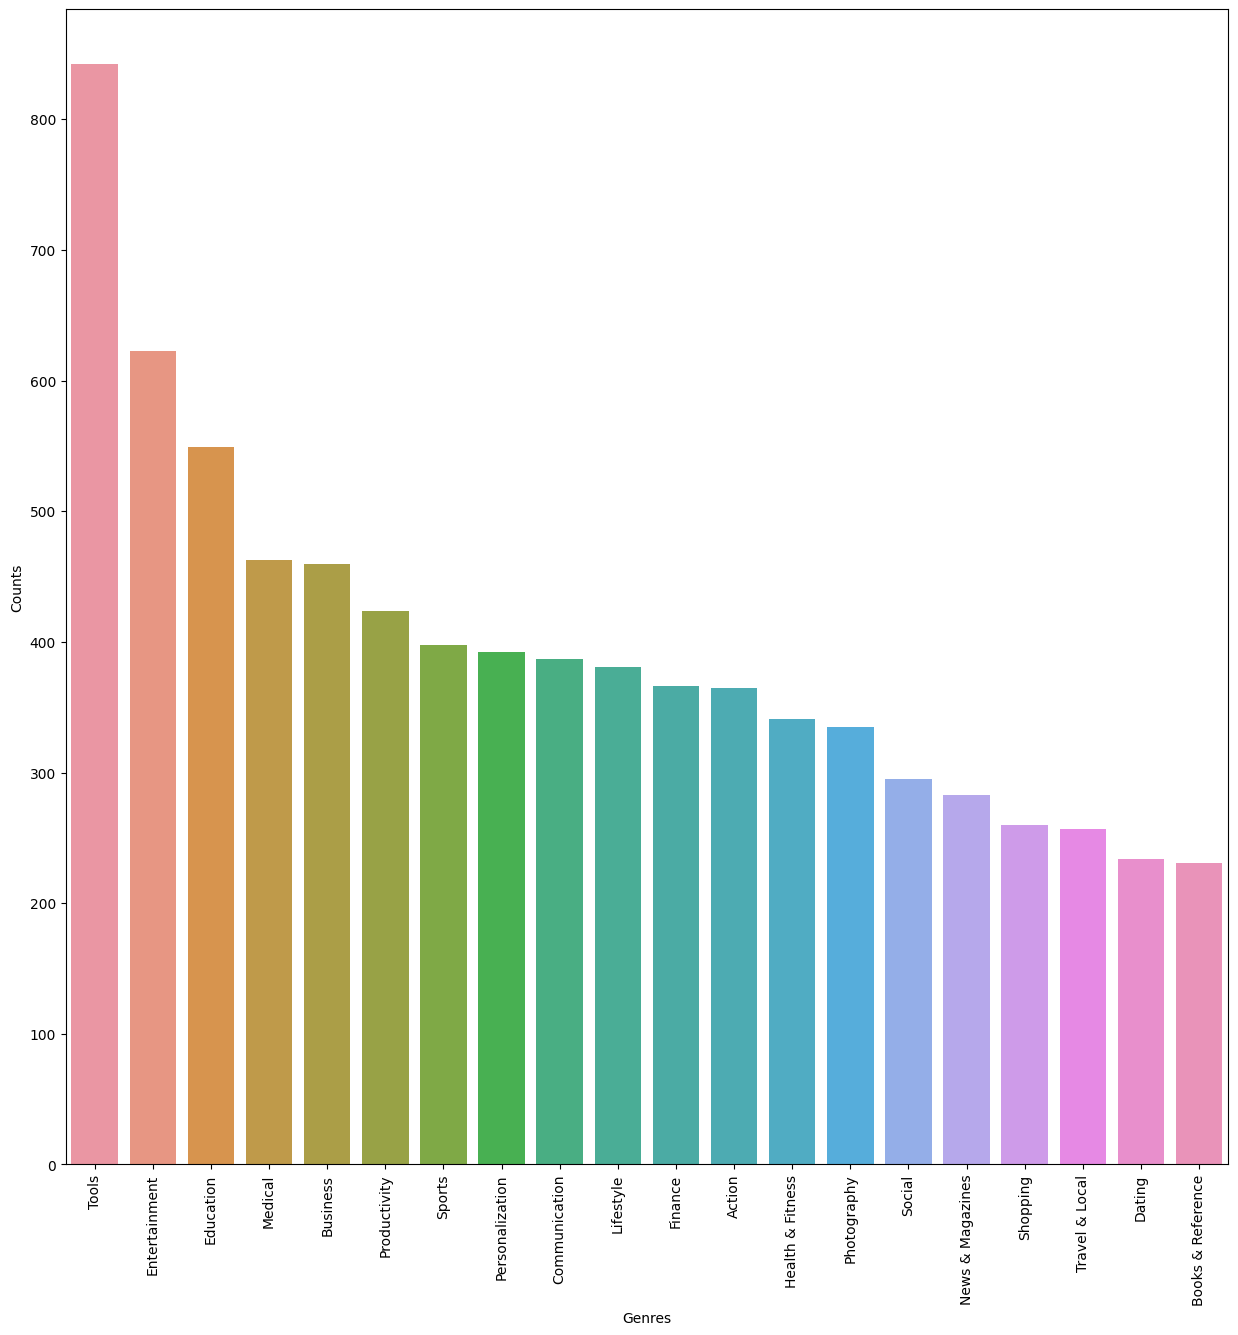

In [244]:
###Which are the Genres that are getting installed the most in top 20 Genres?
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(top_install_genres_20.Genres, top_install_genres_20.Counts)

#### as we can see that maximum number of apps present in google play store is tools,entertainment, education  but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

## To check the install of each category

In [180]:

top_category = df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})


In [210]:
top_install=df.groupby('Category').Installs.sum()

In [203]:
top_category.head()

,Category,Count
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460


In [262]:
top_Category_install=pd.merge(top_category,top_install, on='Category')

In [263]:
top_Category_install.head()

,Category,Count,Installs
0,FAMILY,1972,10258263505
1,GAME,1144,35086024415
2,TOOLS,843,11452771915
3,MEDICAL,463,53257437
4,BUSINESS,460,1001914865


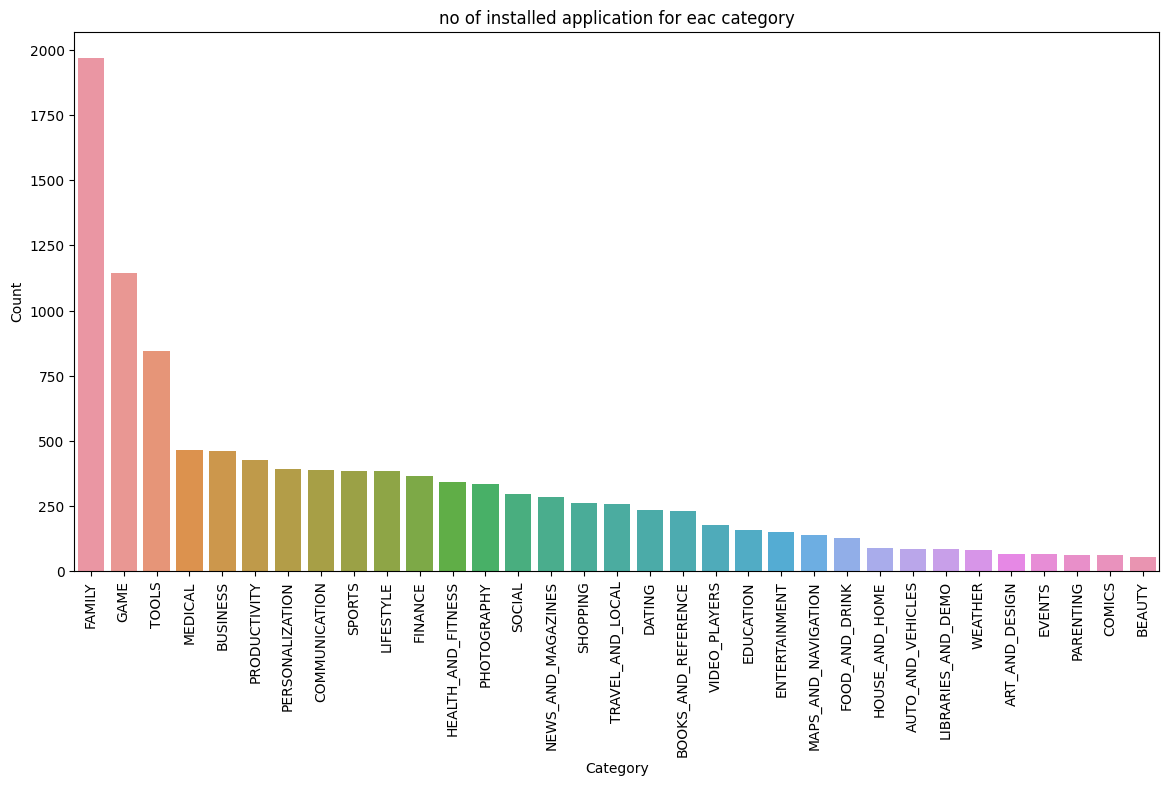

In [225]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.title("no of installed application for eac category")
sns.barplot(top_Category_install.Category, top_Category_install.Count)
plt.show()

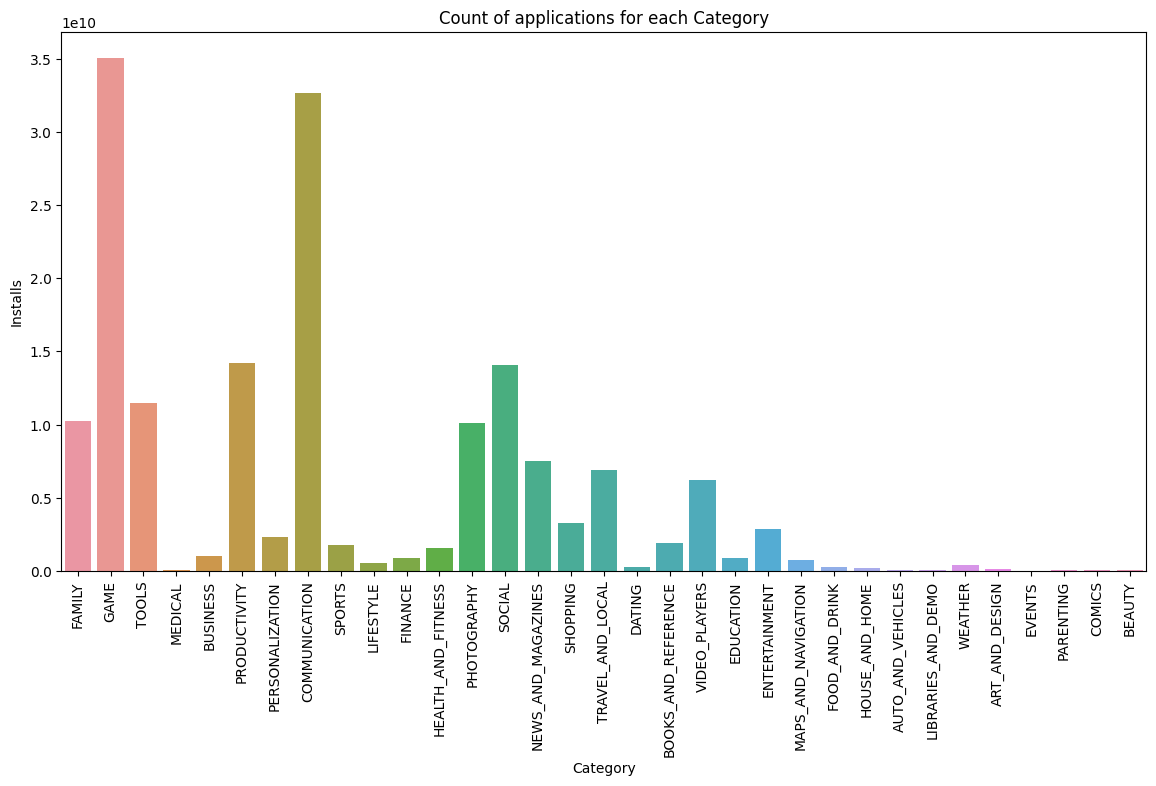

In [224]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.title("Count of applications for each Category")
sns.barplot(top_Category_install.Category, top_Category_install.Installs)
plt.show()

#### As we can see in the above graph we can see that maximum number of apps present in google playstore comes under family, game, tools but the maximum apps installed are game, communnication

In [266]:
genre_rate=df.groupby(['Genres']).Rating.mean()

In [268]:
genre_rating=pd.merge(top_install_genres, genre_rate, on='Genres')

In [269]:
genre_rating

,Genres,Counts,Installs,Rating
0,Tools,842,11442771915,4.046794
1,Entertainment,623,5064214684,4.089493
2,Education,549,500910148,4.302564
3,Medical,463,53257437,4.189143
4,Business,460,1001914865,4.121452
...,...,...,...,...
114,Parenting;Brain Games,1,1000000,3.800000
115,Travel & Local;Action & Adventure,1,100000,4.100000
116,Lifestyle;Pretend Play,1,10000000,4.000000
117,Tools;Education,1,10000000,4.500000


<AxesSubplot: xlabel='RATINGS', ylabel='FREQUENCY'>

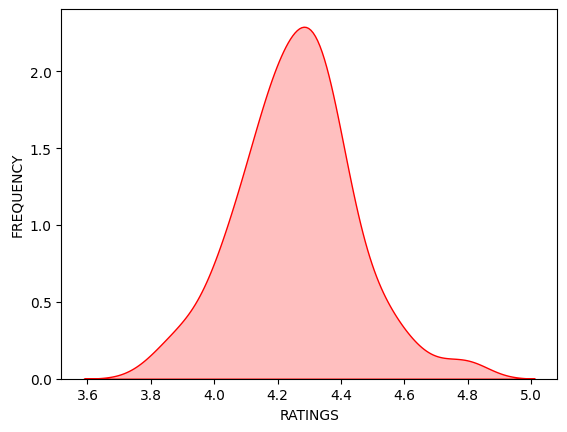

In [275]:
plt.xlabel('RATINGS')
plt.ylabel('FREQUENCY')
sns.kdeplot(genre_rating.Rating, shade='blue', color='red')

#### As we can the curve is uniformly skewed which is symmetric

In [282]:
genre_rating.sort_values('Rating',ascending=False, inplace=True)

In [288]:
highest_rated_genre=genre_rating.head(20)

In [304]:
lowest_rated_genre=genre_rating.iloc[-20:]

In [306]:
lowest_rated_genre=lowest_rated_genre[lowest_rated_genre['Rating'].notnull()]

<AxesSubplot: xlabel='Genres', ylabel='Rating'>

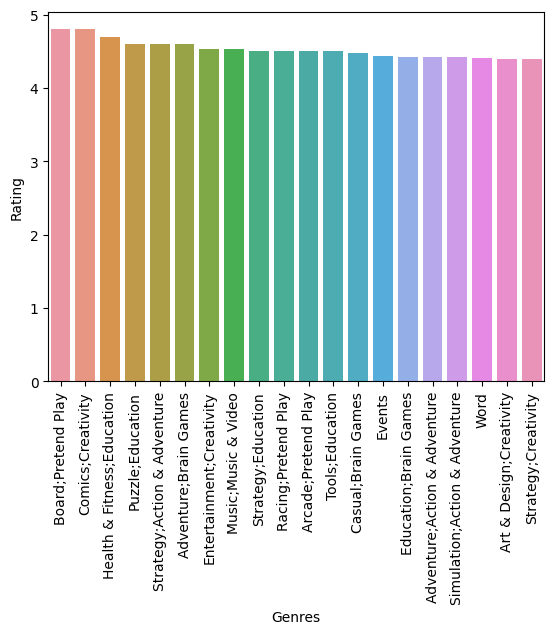

In [303]:
plt.xticks(rotation=90)
sns.barplot(highest_rated_genre.Genres, highest_rated_genre.Rating)


<AxesSubplot: xlabel='Genres', ylabel='Rating'>

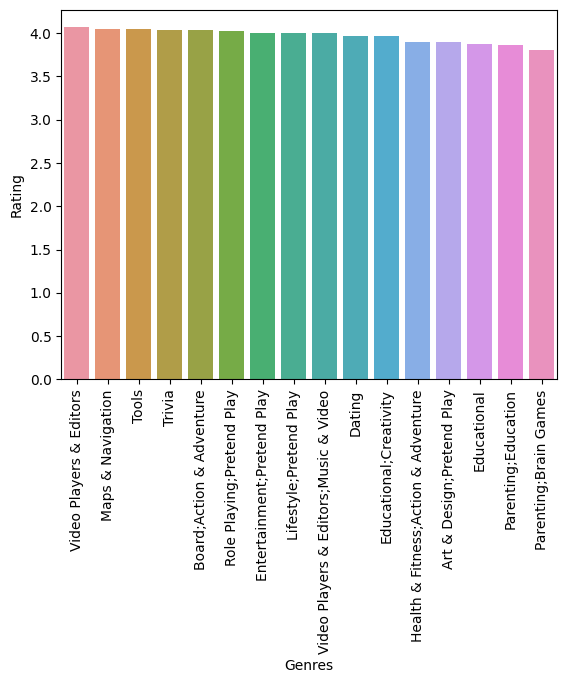

In [308]:
plt.xticks(rotation=90)
sns.barplot(lowest_rated_genre.Genres, lowest_rated_genre.Rating)

##### As we we can highested rated genre is board;pretend play and comics,creativity and lowest rated genre are video players & editors, map & navigation